<a href="https://colab.research.google.com/github/sanchalee19/Celebal-tasks-/blob/main/task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### STEP 1: LOADING THE DATASET

In [ ]:
import seaborn as sns
import pandas as pd

In [ ]:
# Load the Titanic dataset
titanic = sns.load_dataset('titanic')

# Display the first few rows
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### STEP 2: FEATURE ENGINEERING

In [ ]:
# Fill missing values
titanic['age'].fillna(titanic['age'].median(), inplace=True)
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)
titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)
titanic['fare'].fillna(titanic['fare'].median(), inplace=True)

In [ ]:
# Drop 'who', 'deck', 'embark_town' columns
titanic.drop(['who', 'deck', 'embark_town'], axis=1, inplace=True)

In [ ]:
# Convert categorical columns to numeric
titanic = pd.get_dummies(titanic, columns=['sex', 'embarked', 'class', 'adult_male', 'alive', 'alone'])


In [ ]:
# Drop 'alive' column as it's redundant with 'survived'
titanic.drop(['alive_yes', 'alive_no'], axis=1, inplace=True)

In [ ]:
# Display the first few rows after feature engineering
titanic.head()

,survived,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third,adult_male_False,adult_male_True,alone_False,alone_True
0,0,3,22.0,1,0,7.2500,False,True,False,False,True,False,False,True,False,True,True,False
1,1,1,38.0,1,0,71.2833,True,False,True,False,False,True,False,False,True,False,True,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True,False,False,True,True,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True,True,False,False,True,False,True,False
4,0,3,35.0,0,0,8.0500,False,True,False,False,True,False,False,True,False,True,False,True


### STEP 3: VISUALIZATION

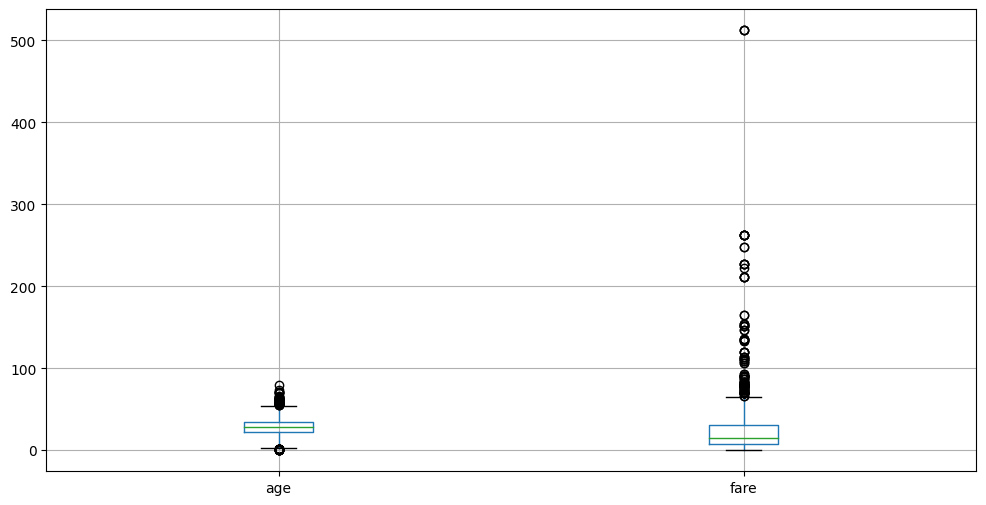

In [ ]:
import matplotlib.pyplot as plt

# Create box plots for numerical features
plt.figure(figsize=(12, 6))
titanic[['age', 'fare']].boxplot()
plt.show()

### STEP 4: DEALING WITH OUTLIERS USING IQR

In [ ]:
# Calculate IQR for age and fare
Q1 = titanic[['age', 'fare']].quantile(0.25)
Q3 = titanic[['age', 'fare']].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
outliers = (titanic[['age', 'fare']] < (Q1 - 1.5 * IQR)) | (titanic[['age', 'fare']] > (Q3 + 1.5 * IQR))

# Remove outliers
titanic = titanic[~(outliers.any(axis=1))]

# Display the shape after removing outliers
titanic.shape

(721, 18)

### STEP 5: TRAIN TEST SPLITTING

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = titanic.drop('survived', axis=1)
y = titanic['survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((576, 17), (145, 17), (576,), (145,))

### STEP 6: MODEL TRAINING

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

### STEP 7: MODEL EVALUATION

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, mean_squared_error, r2_score

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred)

# Recall
recall = recall_score(y_test, y_pred)

# F1 Score
f1 = f1_score(y_test, y_pred)

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Mean Squared Error and Root Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# R-squared
r_squared = r2_score(y_test, y_pred)

In [ ]:
# Display results
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC: {auc:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared: {r_squared:.2f}')

Confusion Matrix:
[[81 14]
 [15 35]]
Accuracy: 0.80
Precision: 0.71
Recall: 0.70
F1 Score: 0.71
ROC AUC: 0.84
Mean Squared Error: 0.20
Root Mean Squared Error: 0.45
R-squared: 0.11


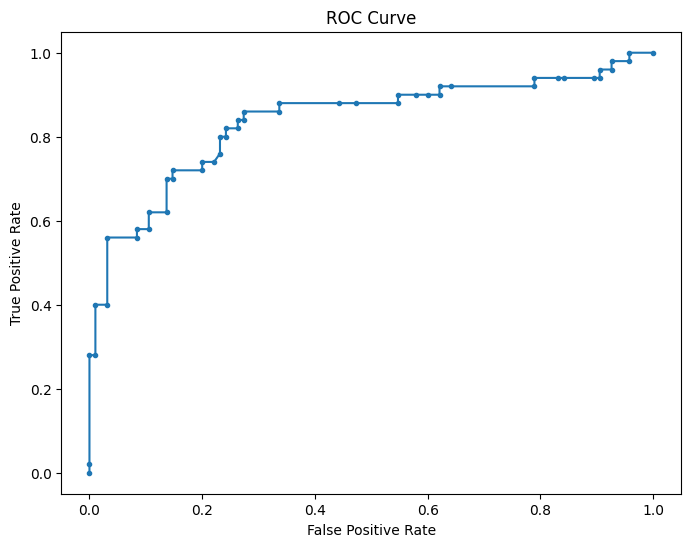

In [ ]:
# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()